                            open   high  close    low  hour_return  \
date                                                                 
2021-10-26 16:00:00+07:00  196.2  196.2  195.5  195.5    -0.356779   
2021-10-26 15:00:00+07:00  195.3  196.8  196.1  195.2     0.409626   
2021-10-26 14:00:00+07:00  195.2  195.4  195.3  194.5     0.051230   
2021-10-26 13:00:00+07:00  195.6  195.7  195.2  194.6    -0.204499   
2021-10-26 12:00:00+07:00  196.0  196.7  195.6  195.5    -0.204082   
...                          ...    ...    ...    ...          ...   
2021-09-28 19:00:00+07:00  147.7  148.3  146.0  145.5    -1.150982   
2021-09-28 18:00:00+07:00  146.0  148.0  147.7  145.5     1.164384   
2021-09-28 17:00:00+07:00  145.8  146.7  145.9  144.7     0.068587   
2021-09-28 16:00:00+07:00  146.3  146.9  145.7  145.2    -0.410116   
2021-09-28 15:00:00+07:00  145.1  146.9  146.2  144.1     0.758098   

                                  day  hour  type  
date                                 

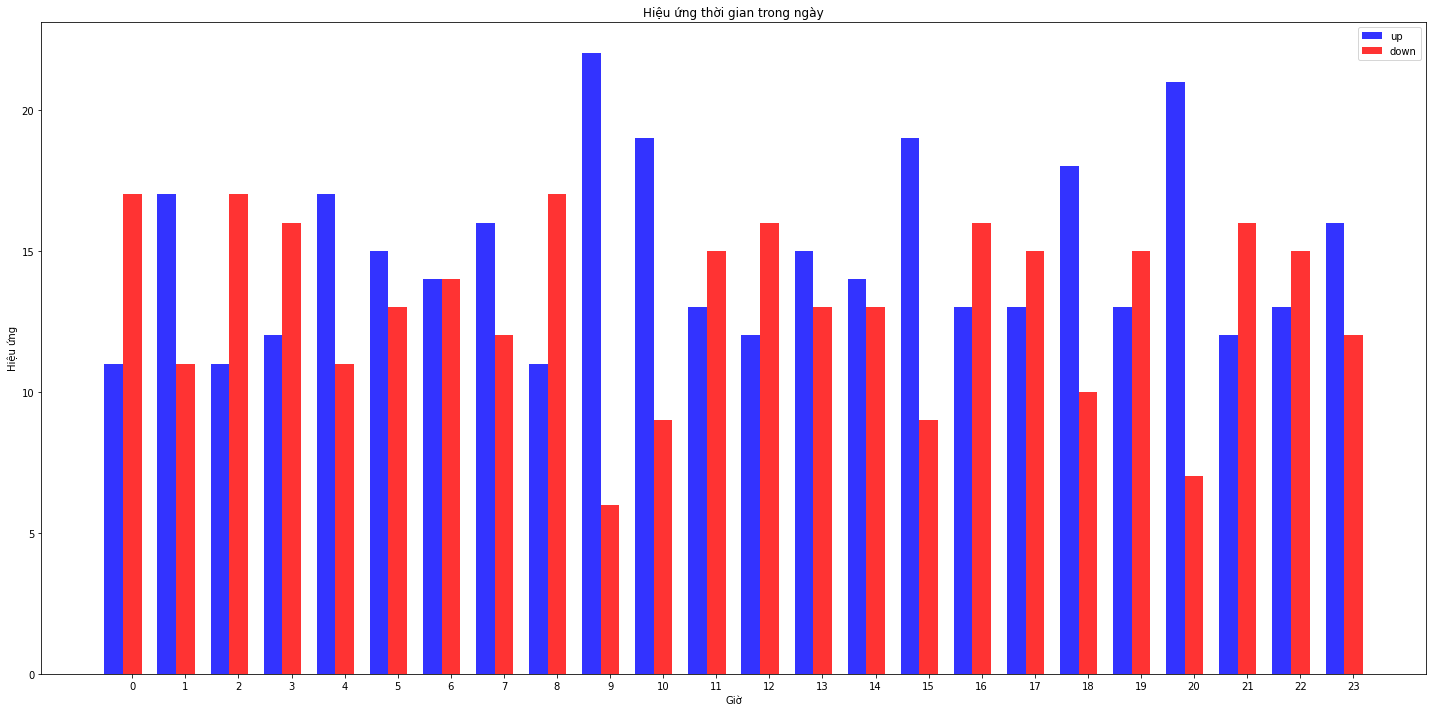

In [30]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('LTCUSDT')
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*28, "DESC")

data_prices = candlestick.to_df()

# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)

# data_prices = data_prices[data_prices['hour'] == 10]

# number_up = len(data_prices[data_prices['type'] == 'up'])
# number_down = len(data_prices[data_prices['type'] == 'down'])

# print(number_up)
# print(number_down)

print(data_prices)

bar_width = 0.35
opacity = 0.8

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


# x = data_prices[data_prices['hour'] == 13]


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]
    print(f"Giờ {i}")
    print("________________________________")
    print(data_prices_x[data_prices_x['type'] == 'up']['hour_return'].describe())
    print("+++")
    print(data_prices_x[data_prices_x['type'] == 'down']['hour_return'].describe())

    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()






In [ ]:
data_prices[data_prices['hour_return']==data_prices['hour_return'].max()]


In [28]:
def highest_in_day(x):
    max = data_prices[data_prices.day == x.day].hour_return.max()
    return data_prices[(data_prices.day == x.day) & (data_prices.hour_return == max)].hour.iat[0]


data_prices['highest_in_day'] = data_prices[[
    'day']].apply(lambda x: highest_in_day(x), axis=1)

highest_in_day_group = data_prices.groupby(
    'day').mean().groupby('highest_in_day').count()



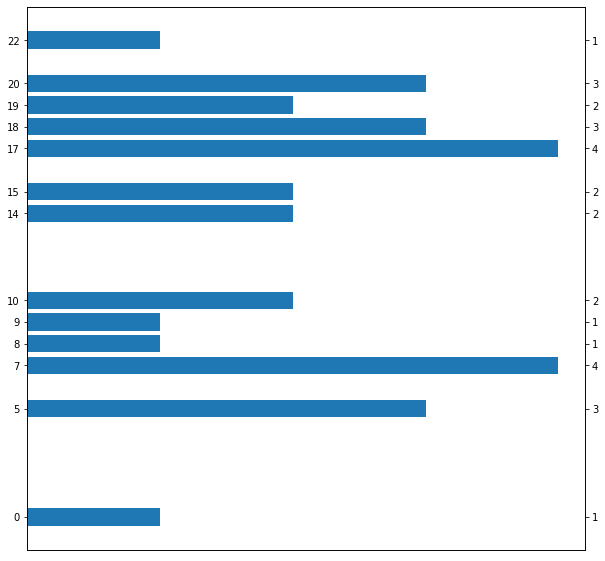

In [29]:

list_hours = [int(hour) for hour in highest_in_day_group.index.values.tolist()]
list_highest_in_day = highest_in_day_group['hour'].tolist()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_highest_in_day, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_highest_in_day)

plt.show()
